# super()로 기반 클래스 초기화

In [ ]:
class Person:
    def __init__(self):
        self.hello = '안녕하세요.'

class Student(Person):
    def __init__(self):
        self.school = '디지털스마트부산아카데미'

dp = Student()
print(dp.school)
print(dp.hello)    # 부모 클래스의 속성을 출력하려고 하면 에러가 발생함

디지털스마트부산아카데미


AttributeError: ignored

In [ ]:
class Person:
    def __init__(self):
        self.hello = '안녕하세요.'

class Student(Person):
    def __init__(self):
        super().__init__()                # super()로 기반 클래스의 __init__ 메서드 호출
        self.school = '디지털스마트부산아카데미'

dp = Student()
print(dp.school)
print(dp.hello)

디지털스마트부산아카데미
안녕하세요.


# 클래스를 초기화하지 않아도 되는 경우

In [ ]:
class Person:
    def __init__(self):
        self.hello = '안녕하세요.'

class Student(Person):
    pass

dp = Student()
print(dp.hello)

안녕하세요.


# 인공신경망

## 데이터셋 다운로드

In [ ]:
!pip install -U --no-cache-dir gdown --pre
print("Downloading...")
!gdown --id {"1NDg2_ccmxkWDu2e_2hsngYI5pzY4qWkW"} -O reg.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NDg2_ccmxkWDu2e_2hsngYI5pzY4qWkW
To: /content/reg.csv
100% 138k/138k [00:00<00:00, 46.8MB/s]


## 모델 구조 및 가중치 확인

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

#!pip install torchsummary
from torchsummary import summary

In [ ]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13, 50)
        self.fc2 = nn.Linear(50, 30)
        self.fc3 = nn.Linear(30, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))

        return x

In [ ]:
model = Regressor()

In [ ]:
print(model)

Regressor(
  (fc1): Linear(in_features=13, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
for parameter in model.parameters():
    print(parameter.size())

torch.Size([50, 13])
torch.Size([50])
torch.Size([30, 50])
torch.Size([30])
torch.Size([1, 30])
torch.Size([1])


In [ ]:
for name, param in model.named_parameters():
    print(name, param.size())

fc1.weight torch.Size([50, 13])
fc1.bias torch.Size([50])
fc2.weight torch.Size([30, 50])
fc2.bias torch.Size([30])
fc3.weight torch.Size([1, 30])
fc3.bias torch.Size([1])


In [ ]:
print(model.fc1.weight.size(), model.fc1.bias.size())

torch.Size([50, 13]) torch.Size([50])


In [ ]:
model.fc1.weight   # weight변수로 가중치 확인 가능

Parameter containing:
tensor([[-0.1017, -0.0364,  0.0437, -0.0081,  0.0473, -0.1178, -0.0878,  0.1167,
          0.1389, -0.1733,  0.1947,  0.1726, -0.1052],
        [-0.1266, -0.0007,  0.0657, -0.2175,  0.1563, -0.0431, -0.1043, -0.2408,
          0.2091,  0.0519,  0.0169, -0.0323,  0.2235],
        [ 0.1013,  0.2403, -0.1075, -0.0611, -0.1639,  0.1982, -0.2370, -0.0430,
          0.0772,  0.1322, -0.2641, -0.1378, -0.2378],
        [ 0.0195,  0.2148, -0.1387,  0.2104, -0.0901,  0.0612,  0.2267, -0.0251,
         -0.0408,  0.1102,  0.0782,  0.1954, -0.1082],
        [ 0.2534, -0.2662,  0.2149, -0.0536, -0.2048, -0.1123, -0.1681,  0.1590,
          0.0913, -0.2500, -0.2346, -0.0137, -0.0128],
        [-0.1179, -0.2062,  0.1078,  0.2343,  0.1236,  0.2430,  0.1238,  0.1591,
          0.1801, -0.0992, -0.1021, -0.2165,  0.0213],
        [-0.0491, -0.1884, -0.0140, -0.1112, -0.2466, -0.2185, -0.2223,  0.0881,
          0.0237,  0.0930,  0.0926,  0.1461, -0.1171],
        [-0.1007,  0.1972,

In [ ]:
model.fc1.bias

Parameter containing:
tensor([ 0.2002,  0.0575, -0.0591, -0.0935,  0.0549,  0.2135, -0.2363,  0.1525,
        -0.0281, -0.1687, -0.2771,  0.2326, -0.2170,  0.1777,  0.1276,  0.1344,
        -0.0998,  0.1507,  0.0733,  0.1040, -0.2729, -0.2704,  0.2240, -0.1732,
        -0.1939,  0.0174, -0.2002, -0.2568,  0.0481,  0.0962, -0.0347,  0.1397,
         0.1633,  0.0575, -0.0551,  0.2732, -0.2634,  0.0035, -0.0076,  0.1701,
         0.1251, -0.1315, -0.2107, -0.2298,  0.2099,  0.2737, -0.0818,  0.1959,
         0.0371, -0.2628], requires_grad=True)

In [ ]:
summary(model, (10, 13))   # Linear 파라미터 수 = (입력 특성의 수 * 출력 뉴런의 수) + 출력 뉴런의 수(절편)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 10, 50]             700
            Linear-2               [-1, 10, 30]           1,530
           Dropout-3               [-1, 10, 30]               0
            Linear-4                [-1, 10, 1]              31
Total params: 2,261
Trainable params: 2,261
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.01
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [ ]:
(50 * 30) + 30

1530

# 집값 예측하기

In [ ]:
import pandas as pd # 데이터프레임 형태를 다룰 수 있는 라이브러리
import numpy as np
from sklearn.model_selection import train_test_split # 전체 데이터를 학습 데이터와 평가 데이터로 나눈다.
# ANN
import torch
from torch import nn, optim # torch 내의 세부적인 기능을 불러온다. (신경망 기술, 손실함수, 최적화 방법 등)
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
import torch.nn.functional as F # torch 내의 세부적인 기능을 불러온다. (신경망 기술 등)
# Loss
from sklearn.metrics import mean_squared_error # Regression 문제의 평가를 위해 MSE(Mean Squared Error)를 불러온다.
# Plot
import matplotlib.pyplot as plt # 시각화 도구

In [ ]:
df = pd.read_csv('./reg.csv', index_col=[0])
df.head()

In [ ]:
# 데이터를 넘파이 배열로 만들기
X = df.drop('Price', axis=1).to_numpy() # 데이터프레임에서 타겟값(Price)을 제외하고 넘파이 배열로 만들기
Y = df['Price'].to_numpy().reshape((-1,1)) # 데이터프레임 형태의 타겟값을 넘파이 배열로 만들기

In [ ]:
print(f'X:{X.shape}, Y:{Y.shape}')

X:(506, 13), Y:(506, 1)


In [ ]:
class TensorData(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [ ]:
# 전체 데이터를 학습 데이터와 평가 데이터로 나눈다.
# 기준으로 잡은 논문이 전체 데이터를 50%, 50%로 나눴기 때문에 test size를 0.5로 설정한다.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

# 학습 데이터, 시험 데이터 배치 형태로 구축하기
trainsets = TensorData(X_train, Y_train)
trainloader = torch.utils.data.DataLoader(trainsets, batch_size=32, shuffle=True)

testsets = TensorData(X_test, Y_test)
testloader = torch.utils.data.DataLoader(testsets, batch_size=32, shuffle=False)

In [ ]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__() # 모델 연산 정의
#         self.fc1 = nn.Linear(13, 50) # 입력층(13) -> 은닉층1(50)으로 가는 연산
#         self.fc2 = nn.Linear(50, 30) # 은닉층1(50) -> 은닉층2(30)으로 가는 연산
#         self.fc3 = nn.Linear(30, 1) # 은닉층2(30) -> 출력층(1)으로 가는 연산
#         self.dropout = nn.Dropout(0.5) # 연산이 될 때마다 50%의 비율로 랜덤하게 노드를 없앤다.

#     def forward(self, x): # 모델 연산의 순서를 정의
#         x = F.relu(self.fc1(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.
#         x = self.dropout(F.relu(self.fc2(x))) # 은닉층2에서 드랍아웃을 적용한다.(즉, 30개의 20%인 6개의 노드가 계산에서 제외된다.)
#         x = F.relu(self.fc3(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.

#         return x
# # 주의 사항
# # 드랍아웃은 과적합(overfitting)을 방지하기 위해 노드의 일부를 배제하고 계산하는 방식이기
# # 때문에 절대로 출력층에 사용해서는 안 된다.

In [ ]:
model = Regressor()
criterion = nn.MSELoss()
# lr은 학습률이다.
# weight_decay는 L2 정규화에서의 penalty 정도를 의미한다.
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)

In [ ]:
loss_ = [] # 그래프를 그리기 위한 loss 저장용 리스트
n = len(trainloader)

for epoch in range(400): # 400번 학습을 진행한다.
    running_loss = 0.0
    for data in trainloader: # 무작위로 섞인 32개 데이터가 있는 배치가 하나 씩 들어온다.
        inputs, values = data # data에는 X, Y가 들어있다.
        optimizer.zero_grad() # 최적화 초기화

        outputs = model(inputs) # 모델에 입력값 대입 후 예측값 산출
        loss = criterion(outputs, values) # 손실 함수 계산
        loss.backward() # 손실 함수 기준으로 역전파 설정
        optimizer.step() # 역전파를 진행하고 가중치 업데이트

        running_loss += loss.item() # epoch 마다 평균 loss를 계산하기 위해 배치 loss를 더한다.
    loss_.append(running_loss/n) # MSE(Mean Squared Error) 계산



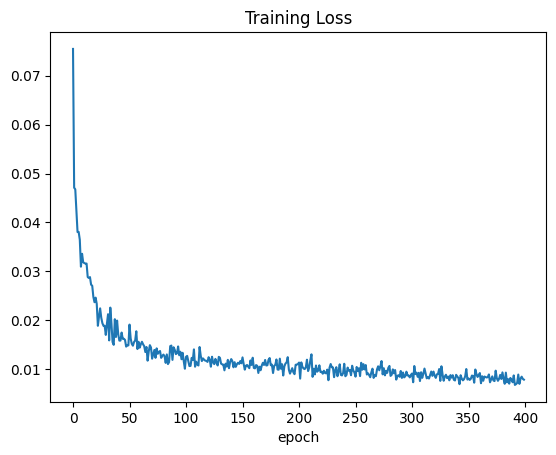

In [ ]:
plt.plot(loss_)
plt.title("Training Loss")
plt.xlabel("epoch")
plt.show()

In [ ]:
def evaluation(dataloader):
    predictions = torch.tensor([], dtype=torch.float) # 예측값을 저장하는 텐서
    actual = torch.tensor([], dtype=torch.float) # 실제값을 저장하는 텐서

    with torch.no_grad():
        model.eval() # 평가를 할 때에는 .eval() 반드시 사용해야 한다.
        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)
            predictions = torch.cat((predictions, outputs), 0) # cat을 통해 예측값을 누적
            actual = torch.cat((actual, values), 0) # cat을 통해 실제값을 누적

    predictions = predictions.numpy() # 넘파이 배열로 변경
    actual = actual.numpy() # 넘파이 배열로 변경
    rmse = np.sqrt(mean_squared_error(predictions, actual)) # sklearn을 이용하여 RMSE 계산

    return rmse

# 평가 시 .eval()을 사용해야 하는 이유
# 평가 시에는 온전한 모델로 평가를 해야하는데 .eval()이 아닌 .train()인 경우 드랍아웃이 활성화 되어 있다.
# 따라서 드랍아웃이나 배치 정규화 등과 같이 학습 시에만 사용하는 기술들을 평가 시에는 비활성화 해야만 한다.

In [ ]:
train_rmse = evaluation(trainloader) # 학습 데이터의 RMSE
test_rmse = evaluation(testloader) # 시험 데이터의 RMSE

print("Train RMSE: ",train_rmse)
print("Test RMSE: ",test_rmse)

Train RMSE:  0.07131189
Test RMSE:  0.112202995


## 교차 검증

In [ ]:
import pandas as pd # 데이터프레임 형태를 다룰 수 있는 라이브러리
import numpy as np
from sklearn.model_selection import train_test_split # 전체 데이터를 학습 데이터와 평가 데이터로 나눈다.

# ANN
import torch
from torch import nn, optim # torch 내의 세부적인 기능을 불러온다. (신경망 기술, 손실함수, 최적화 방법 등)
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
import torch.nn.functional as F # torch 내의 세부적인 기능을 불러온다. (신경망 기술 등)

# Cross Validation
from sklearn.model_selection import KFold

# Loss
from sklearn.metrics import mean_squared_error # Regression 문제의 평가를 위해 MSE(Mean Squared Error)를 불러온다.

# Plot
import matplotlib.pyplot as plt # 시각화 도구

In [ ]:
df = pd.read_csv('./reg.csv', index_col=[0])

In [ ]:
# 데이터를 넘파이 배열로 만들기
X = df.drop('Price', axis=1).to_numpy() # 데이터프레임에서 타겟값(Price)을 제외하고 넘파이 배열로 만들기
Y = df['Price'].to_numpy().reshape((-1,1)) # 데이터프레임 형태의 타겟값을 넘파이 배열로 만들기

In [ ]:
X.shape

(506, 13)

In [ ]:
class TensorData(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):

        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7)
trainset = TensorData(X_train, Y_train)
testset = TensorData(X_test, Y_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

In [ ]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__() # 모델 연산 정의
#         self.fc1 = nn.Linear(13, 50, bias=True) # 입력층(13) -> 은닉층1(50)으로 가는 연산
#         self.fc2 = nn.Linear(50, 30, bias=True) # 은닉층1(50) -> 은닉층2(30)으로 가는 연산
#         self.fc3 = nn.Linear(30, 1, bias=True) # 은닉층2(30) -> 출력층(1)으로 가는 연산

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)

#         return x

In [ ]:
kfold = KFold(n_splits=3, shuffle=True)

In [ ]:
criterion = nn.MSELoss()

In [ ]:
def evaluation(dataloader):

    predictions = torch.tensor([], dtype=torch.float) # 예측값을 저장하는 텐서
    actual = torch.tensor([], dtype=torch.float) # 실제값을 저장하는 텐서

    with torch.no_grad():
        model.eval() # 평가를 할 때에는 .eval() 반드시 사용해야 한다.
        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)

            predictions = torch.cat((predictions, outputs), 0) # cat을 통해 예측값을 누적
            actual = torch.cat((actual, values), 0) # cat을 통해 실제값을 누적

    predictions = predictions.numpy() # 넘파이 배열로 변경
    actual = actual.numpy() # 넘파이 배열로 변경
    rmse = np.sqrt(mean_squared_error(predictions, actual)) # sklearn을 이용하여 RMSE 계산
    model.train()
    return rmse

# 평가 시 .eval()을 사용해야 하는 이유
# 이번 예시에서는 상관없으나 평가 시에는 정규화 기술을 배제하여 온전한 모델로 평가를 해야한다. 따라서 .eval()을 사용한다.
# 즉, 드랍아웃이나 배치 정규화 등과 같이 학습 시에만 사용하는 기술들이 적용 된 모델은 평가 시에는 비활성화 해야하며 학습 시 .train()을 사용한다.

In [ ]:
validation_loss = []
for fold, (train_idx, val_idx) in enumerate(kfold.split(trainset)):
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx) # index 생성
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_idx) # index 생성
    # sampler를 이용한 DataLoader 정의
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                              sampler=train_subsampler)
    valloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                            sampler=val_subsampler)
    # 모델
    model = Regressor()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)

    for epoch in range(400): # 400번 학습을 진행한다.
        for data in trainloader: # 무작위로 섞인 32개 데이터가 있는 배치가 하나 씩 들어온다.
            inputs, values = data # data에는 X, Y가 들어있다.
            optimizer.zero_grad() # 최적화 초기화
            outputs = model(inputs) # 모델에 입력값 대입 후 예측값 산출
            loss = criterion(outputs, values) # 손실 함수 계산
            loss.backward() # 손실 함수 기준으로 역전파 설정
            optimizer.step() # 역전파를 진행하고 가중치 업데이트
    train_rmse = evaluation(trainloader) # 학습 데이터의 RMSE
    val_rmse = evaluation(valloader)
    print("k-fold", fold," Train Loss: %.4f, Validation Loss: %.4f" %(train_rmse, val_rmse))
    validation_loss.append(val_rmse)

validation_loss = np.array(validation_loss)
mean = np.mean(validation_loss)
std = np.std(validation_loss)
print("Validation Score: %.4f, ± %.4f" %(mean, std))

k-fold 0  Train Loss: 0.0857, Validation Loss: 0.1146
k-fold 1  Train Loss: 0.0805, Validation Loss: 0.0980
k-fold 2  Train Loss: 0.0681, Validation Loss: 0.1380
Validation Score: 0.1169, ± 0.0164


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False)
train_rmse = evaluation(trainloader) # 학습 데이터의 RMSE
test_rmse = evaluation(testloader) # 시험 데이터의 RMSE

print("Train RMSE: %.4f" %train_rmse)
print("Test RMSE: %.4f" %test_rmse)

Train RMSE: 0.1313
Test RMSE: 0.1435
